<a href="https://colab.research.google.com/github/mafloan/alurastorelatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


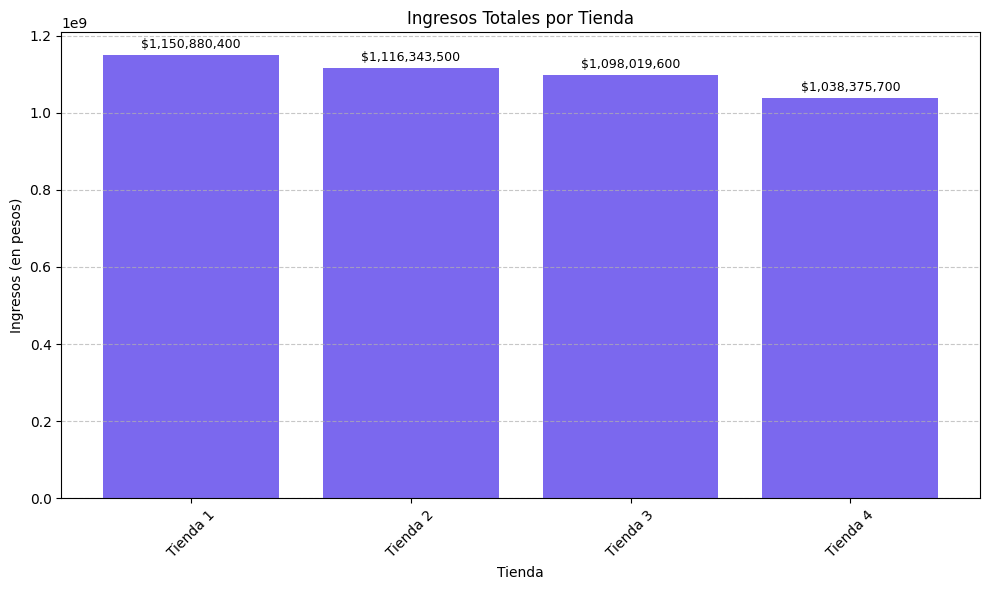

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"


df_unificado = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

df_unificado.head()
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos_totales = []

for tienda in tiendas:
    ingresos = df_unificado[df_unificado["tienda"] == tienda]["Precio"].sum()
    ingresos_totales.append(ingresos)


ingresos_por_tienda = list(zip(tiendas, ingresos_totales))

print("Ingresos por tienda:")
for tienda, ingreso in ingresos_por_tienda:
    print(f"{tienda}: ${ingreso:,.2f}")

    import matplotlib.pyplot as plt

# Separar los nombres y los valores
nombres_tiendas = [t[0] for t in ingresos_por_tienda]
valores_ingresos = [t[1] for t in ingresos_por_tienda]

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(nombres_tiendas, valores_ingresos, color='mediumslateblue')
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos (en pesos)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valores arriba de cada barra
for i, valor in enumerate(valores_ingresos):
    plt.text(i, valor + 10000000, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




# 2. Ventas por categoría

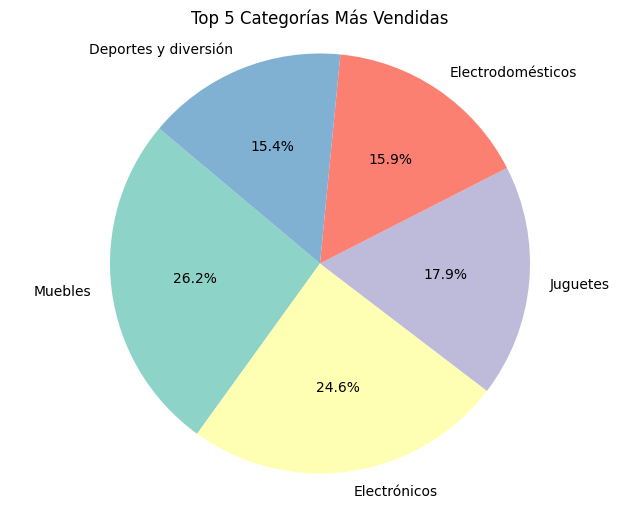

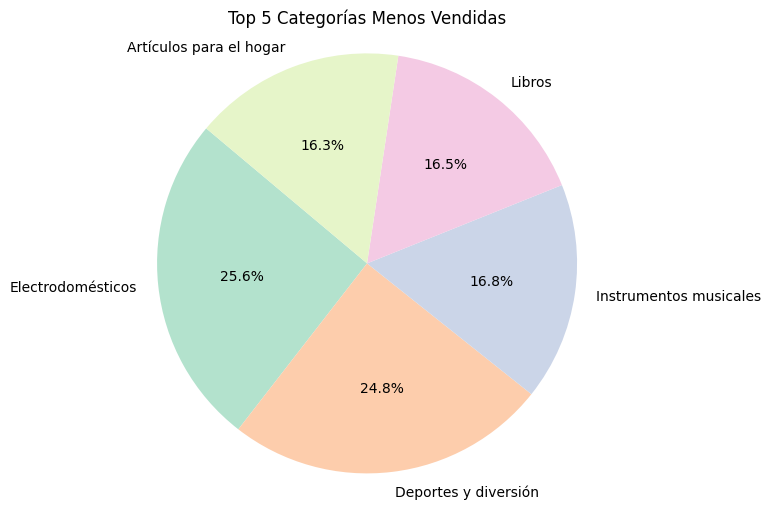

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar archivos desde GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 2. Agregar columna para identificar cada tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# 3. Unificar todos los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# 4. Agrupar por categoría y contar productos vendidos
ventas_por_categoria = df["Categoría del Producto"].value_counts().reset_index()
ventas_por_categoria.columns = ["Categoría", "Cantidad de ventas"]

# 5. Ordenar de mayor a menor para identificar más y menos vendidas
mas_vendidas = ventas_por_categoria.head(5)
menos_vendidas = ventas_por_categoria.tail(5)

# 6. Gráfico de torta - Categorías más vendidas
plt.figure(figsize=(8, 6))
plt.pie(mas_vendidas["Cantidad de ventas"], labels=mas_vendidas["Categoría"],
        autopct="%1.1f%%", startangle=140, colors=plt.cm.Set3.colors)
plt.title("Top 5 Categorías Más Vendidas")
plt.axis('equal')
plt.show()

# 7. Gráfico de torta - Categorías menos vendidas
plt.figure(figsize=(8, 6))
plt.pie(menos_vendidas["Cantidad de ventas"], labels=menos_vendidas["Categoría"],
        autopct="%1.1f%%", startangle=140, colors=plt.cm.Pastel2.colors)
plt.title("Top 5 Categorías Menos Vendidas")
plt.axis('equal')
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 2. Agregar columna con el nombre de la tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# 3. Unir todas las tiendas en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# 4. Agrupar por tienda y categoría, y contar cantidad de ventas
ventas_categoria_tienda = df.groupby(["tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad de ventas")

# 5. Crear una tabla pivote para ver en forma de tabla cruzada
tabla_categorias = ventas_categoria_tienda.pivot(index="Categoría del Producto", columns="tienda", values="Cantidad de ventas").fillna(0).astype(int)

# Mostrar la tabla
print(tabla_categorias)


tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


<Figure size 1200x800 with 0 Axes>

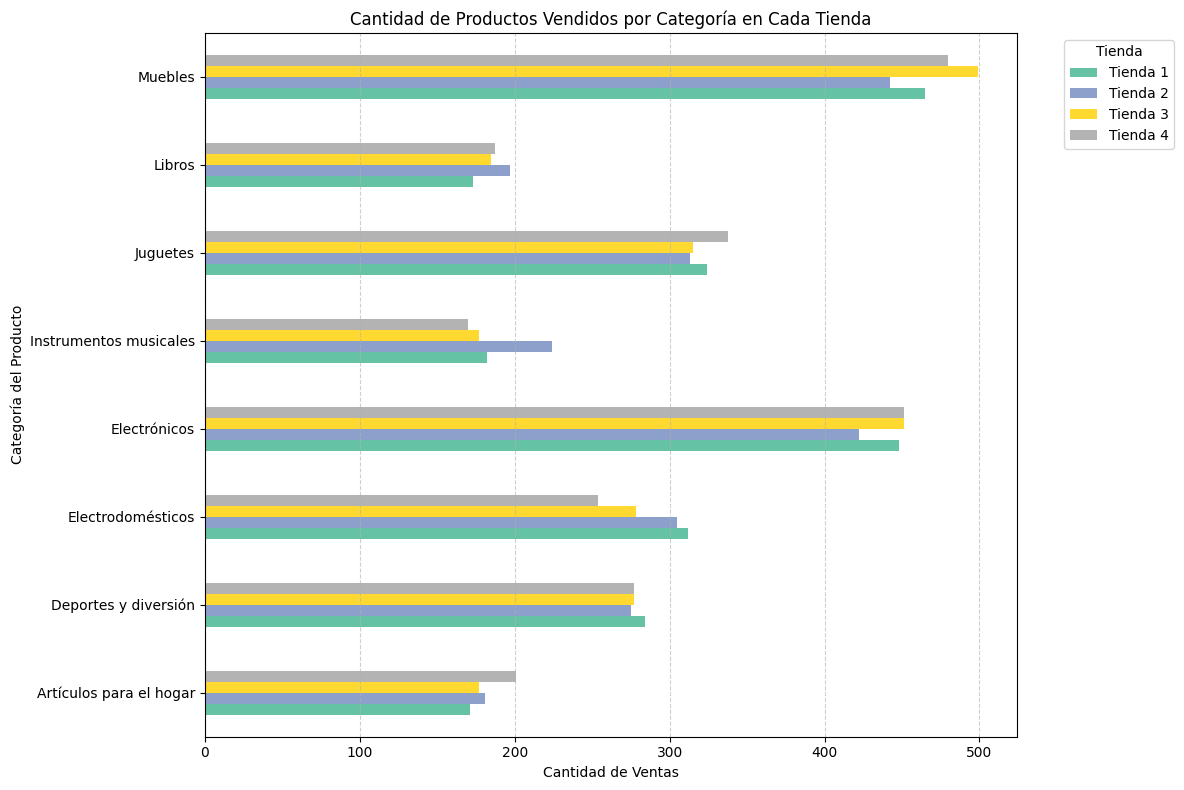

In [ ]:
import matplotlib.pyplot as plt

# 1. Configurar el gráfico
plt.figure(figsize=(12, 8))

# 2. Crear gráfico de barras horizontales
tabla_categorias.plot(kind='barh', figsize=(12, 8), colormap='Set2')

# 3. Estética del gráfico
plt.title("Cantidad de Productos Vendidos por Categoría en Cada Tienda")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Categoría del Producto")
plt.legend(title="Tienda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Mostrar el gráfico
plt.show()



# 5. Envío promedio por tienda

     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


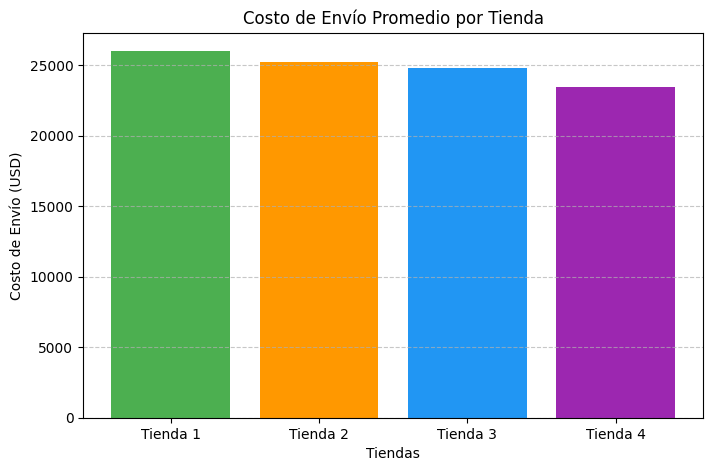

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# head is not needed here, you can remove it if you want
# tienda.head()

# Crear un diccionario con las tiendas
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular promedios y crear DataFrame resumen
promedios = {nombre: df["Costo de envío"].mean() for nombre, df in tiendas.items()}
df_promedios = pd.DataFrame(list(promedios.items()), columns=["Tienda", "Costo Envío Promedio"])

print(df_promedios)

import matplotlib.pyplot as plt
# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(df_promedios["Tienda"], df_promedios["Costo Envío Promedio"], color=["#4CAF50","#FF9800","#2196F3","#9C27B0"])
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío (USD)")
plt.xlabel("Tiendas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Task
Explain the error in the provided Python code, which aims to calculate the total revenue for each store from separate dataframes and then merge them. If possible, fix the error and provide the corrected code. Otherwise, diagnose the error.

## Merge dataframes

### Subtask:
Concatenate the individual store dataframes (`tienda`, `tienda2`, `tienda3`, and `tienda4`) into a single dataframe named `df_unificado`, adding a column to identify the original store for each row.


**Reasoning**:
Concatenate the individual store dataframes into a single dataframe and add a column to identify the original store.



In [ ]:
# Create a list containing the four dataframes
dataframes = [tienda, tienda2, tienda3, tienda4]

# Create a list containing the names of the stores
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Concatenate the dataframes and add a key to identify the store
df_unificado = pd.concat(dataframes, keys=tiendas)

# Reset the index and rename the level_0 column to "tienda"
df_unificado = df_unificado.reset_index(level=0).rename(columns={'level_0': 'tienda'})

# Display the first few rows of the unified dataframe
df_unificado.head()

NameError: name 'tienda2' is not defined

**Reasoning**:
The dataframes `tienda2`, `tienda3`, and `tienda4` were not loaded in the previous code cell. Load all the dataframes again and then concatenate them.



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Create a list containing the four dataframes
dataframes = [tienda, tienda2, tienda3, tienda4]

# Create a list containing the names of the stores
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Concatenate the dataframes and add a key to identify the store
df_unificado = pd.concat(dataframes, keys=tiendas)

# Reset the index and rename the level_0 column to "tienda"
df_unificado = df_unificado.reset_index(level=0).rename(columns={'level_0': 'tienda'})

# Display the first few rows of the unified dataframe
df_unificado.head()

,tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Tienda 1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Tienda 1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Tienda 1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Tienda 1,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Tienda 1,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Code interpreter

### Subtask:
Calculate total revenue by store (Retry #1)


**Reasoning**:
The previous attempt to calculate the total revenue per store failed because the `df_unificado` dataframe was not yet created. Now that it exists, I can use it to calculate the total revenue per store by grouping by the 'tienda' column and summing the 'Precio' column. I will store the result in `ingresos_por_tienda` and display it as requested.



In [ ]:
ingresos_por_tienda = df_unificado.groupby('tienda')['Precio'].sum()
display(ingresos_por_tienda)

,Precio
tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


## Summary:

### Data Analysis Key Findings

* The initial attempt to concatenate the dataframes failed because three of the four dataframes (`tienda2`, `tienda3`, and `tienda4`) had not been loaded into the environment, resulting in a `NameError`.
* The issue was resolved by loading all four dataframes from their respective URLs using `pd.read_csv()` before attempting concatenation.
* The four individual store dataframes were successfully merged into a single dataframe named `df_unificado`.
* A new column named `tienda` was added to `df_unificado` to identify the source store for each row.
* The total revenue for each store was calculated by grouping the unified dataframe by the `tienda` column and summing the `Precio` column.

### Insights or Next Steps

* The error in the initial code was a `NameError` due to not loading all necessary dataframes.
* The corrected code successfully combined the data and calculated the total revenue per store, providing a clear breakdown of revenue sources.
